In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

print("Ïäù=3")

Ïäù=3


In [2]:
data = pd.read_csv('ChatbotData .csv')
data.head()


Q            A  label
0           12Ïãú Îï°!   ÌïòÎ£®Í∞Ä Îòê Í∞ÄÎÑ§Ïöî.      0
1      1ÏßÄÎßù ÌïôÍµê Îñ®Ïñ¥Ï°åÏñ¥    ÏúÑÎ°úÌï¥ ÎìúÎ¶ΩÎãàÎã§.      0
2     3Î∞ï4Ïùº ÎÜÄÎü¨Í∞ÄÍ≥† Ïã∂Îã§  Ïó¨ÌñâÏùÄ Ïñ∏Ï†úÎÇò Ï¢ãÏ£†.      0
3  3Î∞ï4Ïùº Ï†ïÎèÑ ÎÜÄÎü¨Í∞ÄÍ≥† Ïã∂Îã§  Ïó¨ÌñâÏùÄ Ïñ∏Ï†úÎÇò Ï¢ãÏ£†.      0
4          PPL Ïã¨ÌïòÎÑ§   ÎààÏÇ¥Ïù¥ Ï∞åÌë∏Î†§ÏßÄÏ£†.      0

In [3]:
print(len(data))

11823


In [4]:
print(data.isnull().sum())

Q        0
A        0
label    0
dtype: int64


In [5]:
questions = []
for sentence in data['Q']:
    questions.append(sentence)

In [6]:
answers = []
for sentence in data['A']:
    answers.append(sentence)

In [7]:
print(questions[:5])
print(answers[:5])

['12Ïãú Îï°!', '1ÏßÄÎßù ÌïôÍµê Îñ®Ïñ¥Ï°åÏñ¥', '3Î∞ï4Ïùº ÎÜÄÎü¨Í∞ÄÍ≥† Ïã∂Îã§', '3Î∞ï4Ïùº Ï†ïÎèÑ ÎÜÄÎü¨Í∞ÄÍ≥† Ïã∂Îã§', 'PPL Ïã¨ÌïòÎÑ§']
['ÌïòÎ£®Í∞Ä Îòê Í∞ÄÎÑ§Ïöî.', 'ÏúÑÎ°úÌï¥ ÎìúÎ¶ΩÎãàÎã§.', 'Ïó¨ÌñâÏùÄ Ïñ∏Ï†úÎÇò Ï¢ãÏ£†.', 'Ïó¨ÌñâÏùÄ Ïñ∏Ï†úÎÇò Ï¢ãÏ£†.', 'ÎààÏÇ¥Ïù¥ Ï∞åÌë∏Î†§ÏßÄÏ£†.']


# Step 2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ÌïòÍ∏∞
ÏòÅÏñ¥ Îç∞Ïù¥ÌÑ∞ÏôÄÎäî Ï†ÑÌòÄ Îã§Î•∏ Îç∞Ïù¥ÌÑ∞Ïù∏ ÎßåÌÅº ÏòÅÏñ¥ Îç∞Ïù¥ÌÑ∞Ïóê ÏÇ¨Ïö©ÌñàÎçò Ï†ÑÏ≤òÎ¶¨ÏôÄ ÏùºÎ∂Ä ÎèôÏùºÌïú Ï†ÑÏ≤òÎ¶¨ÎèÑ ÌïÑÏöîÌïòÍ≤†ÏßÄÎßå Ï†ÑÏ≤¥Ï†ÅÏúºÎ°úÎäî Îã§Î•∏ Ï†ÑÏ≤òÎ¶¨Î•º ÏàòÌñâÌï¥Ïïº Ìï† ÏàòÎèÑ ÏûàÏäµÎãàÎã§.



Ïù¥Î≤à Ï†ÑÏ≤òÎ¶¨Îäî Ï†ïÍ∑ú ÌëúÌòÑÏãù(Regular Expression)ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Íµ¨ÎëêÏ†ê(punctuation)ÏùÑ Ï†úÍ±∞ÌïòÏó¨ Îã®Ïñ¥Î•º ÌÜ†ÌÅ¨ÎÇòÏù¥Ïßï(tokenizing)ÌïòÎäî ÏùºÏóê Î∞©Ìï¥Í∞Ä ÎêòÏßÄ ÏïäÎèÑÎ°ù Ï†ïÏ†úÌïòÎäî Í≤ÉÏùÑ Î™©ÌëúÎ°ú Ìï©ÎãàÎã§.

In [8]:
# Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò
def preprocess_sentence(sentence):
    sentence = sentence.lower().strip()
    
    # Îã®Ïñ¥ÏôÄ Íµ¨ÎëêÏ†ê(punctuation) ÏÇ¨Ïù¥Ïùò Í±∞Î¶¨Î•º ÎßåÎì≠ÎãàÎã§.
    # ÏòàÎ•º Îì§Ïñ¥ÏÑú "I am a student." => "I am a student ."ÏôÄ Í∞ôÏù¥
    # studentÏôÄ Ïò®Ï†ê ÏÇ¨Ïù¥Ïóê Í±∞Î¶¨Î•º ÎßåÎì≠ÎãàÎã§.
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    
    # (a-z, A-Z, ".", "?", "!", ",")Î•º Ï†úÏô∏Ìïú Î™®Îì† Î¨∏ÏûêÎ•º Í≥µÎ∞±Ïù∏ ' 'Î°ú ÎåÄÏ≤¥Ìï©ÎãàÎã§.
    sentence = re.sub(r"[^a-zA-Z?.!,]+", " ", sentence)
    sentence = sentence.strip()
    return sentence
print("Ïäù=3")

Ïäù=3


In [9]:
questions = []
for sentence in data['Q']:
    questions.append(sentence)

In [10]:
answers = []
for sentence in data['A']:
    answers.append(sentence)

In [11]:
print(questions[:5])
print(answers[:5])

['12Ïãú Îï°!', '1ÏßÄÎßù ÌïôÍµê Îñ®Ïñ¥Ï°åÏñ¥', '3Î∞ï4Ïùº ÎÜÄÎü¨Í∞ÄÍ≥† Ïã∂Îã§', '3Î∞ï4Ïùº Ï†ïÎèÑ ÎÜÄÎü¨Í∞ÄÍ≥† Ïã∂Îã§', 'PPL Ïã¨ÌïòÎÑ§']
['ÌïòÎ£®Í∞Ä Îòê Í∞ÄÎÑ§Ïöî.', 'ÏúÑÎ°úÌï¥ ÎìúÎ¶ΩÎãàÎã§.', 'Ïó¨ÌñâÏùÄ Ïñ∏Ï†úÎÇò Ï¢ãÏ£†.', 'Ïó¨ÌñâÏùÄ Ïñ∏Ï†úÎÇò Ï¢ãÏ£†.', 'ÎààÏÇ¥Ïù¥ Ï∞åÌë∏Î†§ÏßÄÏ£†.']


Ïù¥Î†áÍ≤å Î°úÎìúÌïú Îç∞Ïù¥ÌÑ∞Ïùò ÏÉòÌîå ÏàòÎ•º ÌôïÏù∏Ìï¥ Î≥ºÍπåÏöî?



In [12]:
print('Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò :', len(questions))
print('Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò :', len(answers))

Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò : 11823
Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò : 11823


In [13]:
print('Ï†ÑÏ≤òÎ¶¨ ÌõÑÏùò 22Î≤àÏß∏ ÏßàÎ¨∏ ÏÉòÌîå: {}'.format(questions[21]))
print('Ï†ÑÏ≤òÎ¶¨ ÌõÑÏùò 22Î≤àÏß∏ ÎãµÎ≥Ä ÏÉòÌîå: {}'.format(answers[21]))

Ï†ÑÏ≤òÎ¶¨ ÌõÑÏùò 22Î≤àÏß∏ ÏßàÎ¨∏ ÏÉòÌîå: Í∞ÄÏä§ÎπÑ Ïû•ÎÇú ÏïÑÎãò
Ï†ÑÏ≤òÎ¶¨ ÌõÑÏùò 22Î≤àÏß∏ ÎãµÎ≥Ä ÏÉòÌîå: Îã§Ïùå Îã¨ÏóêÎäî Îçî Ï†àÏïΩÌï¥Î¥êÏöî.


Step 3. SubwordTextEncoder ÏÇ¨Ïö©ÌïòÍ∏∞
ÌïúÍµ≠Ïñ¥ Îç∞Ïù¥ÌÑ∞Îäî ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÌÜ†ÌÅ¨ÎÇòÏù¥ÏßïÏùÑ Ìï¥Ïïº ÌïúÎã§Í≥† ÎßéÏùÄ Î∂ÑÏù¥ ÏïåÍ≥† ÏûàÏäµÎãàÎã§. ÌïòÏßÄÎßå Ïó¨Í∏∞ÏÑúÎäî ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞Í∞Ä ÏïÑÎãå ÏúÑ Ïã§ÏäµÏóêÏÑú ÏÇ¨Ïö©ÌñàÎçò ÎÇ¥Î∂Ä Îã®Ïñ¥ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÏù∏ SubwordTextEncoderÎ•º Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©Ìï¥Î≥¥ÏÑ∏Ïöî.

In [14]:
print("ÏÇ¥Ïßù Ïò§Îûò Í±∏Î¶¥ Ïàò ÏûàÏñ¥Ïöî. Ïä§Ìä∏Î†àÏπ≠ Ìïú Î≤à Ìï¥Î≥ºÍπåÏöî? üëê")

# ÏßàÎ¨∏Í≥º ÎãµÎ≥Ä Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌï¥ÏÑú Vocabulary ÏÉùÏÑ±. (Tensorflow 2.2.0 Ïù¥Ìïò)
# tokenizer = tfds.features.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size=2**13)

# (Ï£ºÏùò) Tensorflow 2.3.0 Ïù¥ÏÉÅÏùò Î≤ÑÏ†ÑÏóêÏÑúÎäî ÏïÑÎûò Ï£ºÏÑùÏùò ÏΩîÎìúÎ•º ÎåÄÏã† Ïã§ÌñâÌï¥ Ï£ºÏÑ∏Ïöî. 
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size=2**13)
print("Ïäù=3 ")

ÏÇ¥Ïßù Ïò§Îûò Í±∏Î¶¥ Ïàò ÏûàÏñ¥Ïöî. Ïä§Ìä∏Î†àÏπ≠ Ìïú Î≤à Ìï¥Î≥ºÍπåÏöî? üëê
Ïäù=3 


In [15]:
# ÏãúÏûë ÌÜ†ÌÅ∞Í≥º Ï¢ÖÎ£å ÌÜ†ÌÅ∞Ïóê Í≥†Ïú†Ìïú Ï†ïÏàòÎ•º Î∂ÄÏó¨Ìï©ÎãàÎã§.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]
print("ok")

ok


In [16]:
print('START_TOKENÏùò Î≤àÌò∏ :' ,[tokenizer.vocab_size])
print('END_TOKENÏùò Î≤àÌò∏ :' ,[tokenizer.vocab_size + 1])

START_TOKENÏùò Î≤àÌò∏ : [8170]
END_TOKENÏùò Î≤àÌò∏ : [8171]


In [17]:
# ÏãúÏûë ÌÜ†ÌÅ∞Í≥º Ï¢ÖÎ£å ÌÜ†ÌÅ∞ÏùÑ Í≥†Î†§ÌïòÏó¨ +2Î•º ÌïòÏó¨ Îã®Ïñ¥Ïû•Ïùò ÌÅ¨Í∏∞Î•º ÏÇ∞Ï†ïÌï©ÎãàÎã§.
VOCAB_SIZE = tokenizer.vocab_size + 2
print(VOCAB_SIZE)

8172


In [18]:
# ÏûÑÏùòÏùò 22Î≤àÏß∏ ÏÉòÌîåÏóê ÎåÄÌï¥ÏÑú Ï†ïÏàò Ïù∏ÏΩîÎî© ÏûëÏóÖÏùÑ ÏàòÌñâ.
# Í∞Å ÌÜ†ÌÅ∞ÏùÑ Í≥†Ïú†Ìïú Ï†ïÏàòÎ°ú Î≥ÄÌôò
print('Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 21Î≤àÏß∏ ÏßàÎ¨∏ ÏÉòÌîå: {}'.format(tokenizer.encode(questions[21])))
print('Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 21Î≤àÏß∏ ÎãµÎ≥Ä ÏÉòÌîå: {}'.format(tokenizer.encode(answers[21])))

Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 21Î≤àÏß∏ ÏßàÎ¨∏ ÏÉòÌîå: [5759, 607, 2490, 4160]
Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 21Î≤àÏß∏ ÎãµÎ≥Ä ÏÉòÌîå: [2353, 7510, 5, 6273, 94, 7960]


In [19]:
sample_string = questions[20]

In [20]:
tokenized_string = tokenizer.encode(sample_string)
print ('Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò Î¨∏Ïû• {}'.format(tokenized_string))

Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò Î¨∏Ïû• [5759, 607, 3502, 138, 681, 3740, 846]


In [21]:
original_string = tokenizer.decode(tokenized_string)
print ('Í∏∞Ï°¥ Î¨∏Ïû•: {}'.format(original_string))

Í∏∞Ï°¥ Î¨∏Ïû•: Í∞ÄÏä§ÎπÑ ÎπÑÏãºÎç∞ Í∞êÍ∏∞ Í±∏Î¶¨Í≤†Ïñ¥


In [22]:
# ÏÉòÌîåÏùò ÏµúÎåÄ ÌóàÏö© Í∏∏Ïù¥ ÎòêÎäî Ìå®Îî© ÌõÑÏùò ÏµúÏ¢Ö Í∏∏Ïù¥
MAX_LENGTH = 40
print(MAX_LENGTH)

40


In [23]:
# Ï†ïÏàò Ïù∏ÏΩîÎî©, ÏµúÎåÄ Í∏∏Ïù¥Î•º Ï¥àÍ≥ºÌïòÎäî ÏÉòÌîå Ï†úÍ±∞, Ìå®Îî©
def tokenize_and_filter(inputs, outputs):
    tokenized_inputs, tokenized_outputs = [], []
    
    for (sentence1, sentence2) in zip(inputs, outputs):
        # Ï†ïÏàò Ïù∏ÏΩîÎî© Í≥ºÏ†ïÏóêÏÑú ÏãúÏûë ÌÜ†ÌÅ∞Í≥º Ï¢ÖÎ£å ÌÜ†ÌÅ∞ÏùÑ Ï∂îÍ∞Ä
        sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
        sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN
        
        # ÏµúÎåÄ Í∏∏Ïù¥ 40 Ïù¥ÌïòÏù∏ Í≤ΩÏö∞ÏóêÎßå Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÌóàÏö©
        if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
            tokenized_inputs.append(sentence1)
            tokenized_outputs.append(sentence2)
            
        # ÏµúÎåÄ Í∏∏Ïù¥ 40ÏúºÎ°ú Î™®Îì† Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ìå®Îî©
    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
        
    return tokenized_inputs, tokenized_outputs
print("Ïäù=3")

Ïäù=3


In [24]:
questions, answers = tokenize_and_filter(questions, answers)
print('Îã®Ïñ¥Ïû•Ïùò ÌÅ¨Í∏∞ :',(VOCAB_SIZE))
print('ÌïÑÌÑ∞ÎßÅ ÌõÑÏùò ÏßàÎ¨∏ ÏÉòÌîå Í∞úÏàò: {}'.format(len(questions)))
print('ÌïÑÌÑ∞ÎßÅ ÌõÑÏùò ÎãµÎ≥Ä ÏÉòÌîå Í∞úÏàò: {}'.format(len(answers)))
print('ÏßàÎ¨∏ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞(shape) :', questions.shape)
print('ÎãµÎ≥Ä Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞(shape) :', answers.shape)

Îã®Ïñ¥Ïû•Ïùò ÌÅ¨Í∏∞ : 8172
ÌïÑÌÑ∞ÎßÅ ÌõÑÏùò ÏßàÎ¨∏ ÏÉòÌîå Í∞úÏàò: 11823
ÌïÑÌÑ∞ÎßÅ ÌõÑÏùò ÎãµÎ≥Ä ÏÉòÌîå Í∞úÏàò: 11823
ÏßàÎ¨∏ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞(shape) : (11823, 40)
ÎãµÎ≥Ä Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞(shape) : (11823, 40)


In [25]:
#3. ÍµêÏÇ¨ Í∞ïÏöî(Teacher Forcing) ÏÇ¨Ïö©ÌïòÍ∏∞

BATCH_SIZE = 64
BUFFER_SIZE = 20000

# ÎîîÏΩîÎçîÎäî Ïù¥Ï†ÑÏùò targetÏùÑ Îã§ÏùåÏùò inputÏúºÎ°ú ÏÇ¨Ïö©Ìï©ÎãàÎã§.
# Ïù¥Ïóê Îî∞Îùº outputsÏóêÏÑúÎäî START_TOKENÏùÑ Ï†úÍ±∞ÌïòÍ≤†ÏäµÎãàÎã§.
dataset = tf.data.Dataset.from_tensor_slices(({'inputs': questions,
                                               'dec_inputs': answers[:, :-1]},
                                              {'outputs': answers[:, 1:]},))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
print("ok")

ok


In [27]:
print(answers[0])
print(answers[:1][:, :-1])
print(answers[:1][:, 1:])

[8170 3837   71 7888 7960 8171    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
[[8170 3837   71 7888 7960 8171    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]]
[[3837   71 7888 7960 8171    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]]


# Step 4. Î™®Îç∏ Íµ¨ÏÑ±ÌïòÍ∏∞
ÏúÑ Ïã§Ïäµ ÎÇ¥Ïö©ÏùÑ Ï∞∏Í≥†ÌïòÏó¨ Ìä∏ÎûúÏä§Ìè¨Î®∏ Î™®Îç∏ÏùÑ Íµ¨ÌòÑÌï©ÎãàÎã§.



### Ïù∏ÏΩîÎçî Ï∏µ Ìï®ÏàòÏôÄ ÎîîÏΩîÎçî Ï∏µ Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Ìä∏ÎûúÏä§Ìè¨Î®∏ Ìï®Ïàò Ï†ïÏùò

In [29]:
# Ìè¨ÏßÄÏÑúÎÖà ÌñâÎ†¨ Íµ¨ÌòÑ
# Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî© Î†àÏù¥Ïñ¥
# Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî© Î†àÏù¥Ïñ¥
# Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî© Î†àÏù¥Ïñ¥
class PositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)
        
    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angles
    
    def positional_encoding(self, position, d_model):
        angle_rads = self.get_angles(position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
                                     i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
                                     d_model=d_model)
        # Î∞∞Ïó¥Ïùò ÏßùÏàò Ïù∏Îç±Ïä§ÏóêÎäî sin Ìï®Ïàò Ï†ÅÏö©
        sines = tf.math.sin(angle_rads[:, 0::2])
        # Î∞∞Ïó¥Ïùò ÌôÄÏàò Ïù∏Îç±Ïä§ÏóêÎäî cosine Ìï®Ïàò Ï†ÅÏö©
        cosines = tf.math.cos(angle_rads[:, 1::2])
        
        pos_encoding = tf.concat([sines, cosines], axis=-1)
        pos_encoding = pos_encoding[tf.newaxis, ...]
        return tf.cast(pos_encoding, tf.float32)
    
    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]
print("Ïäù=3")

Ïäù=3


In [30]:
# Ïä§ÏºÄÏùºÎìú Îã∑ ÌîÑÎ°úÎçïÌä∏ Ïñ¥ÌÖêÏÖò Ìï®Ïàò
def scaled_dot_product_attention(query, key, value, mask):
    """Ïñ¥ÌÖêÏÖò Í∞ÄÏ§ëÏπòÎ•º Í≥ÑÏÇ∞. """
    matmul_qk = tf.matmul(query, key, transpose_b=True)
    
    # scale matmul_qk
    depth = tf.cast(tf.shape(key)[-1], tf.float32)
    logits = matmul_qk / tf.math.sqrt(depth)
    
    # add the mask to zero out padding tokens
    if mask is not None:
        logits += (mask * -1e9)
        
    # softmax is normalized on the last axis (seq_len_k)
    attention_weights = tf.nn.softmax(logits, axis=-1)
    output = tf.matmul(attention_weights, value)
    return output
print("Ïäù=3")

Ïäù=3


In [31]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, name="multi_head_attention"):
        super(MultiHeadAttention, self).__init__(name=name)
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.query_dense = tf.keras.layers.Dense(units=d_model)
        self.key_dense = tf.keras.layers.Dense(units=d_model)
        self.value_dense = tf.keras.layers.Dense(units=d_model)

        self.dense = tf.keras.layers.Dense(units=d_model)

    def split_heads(self, inputs, batch_size):
        inputs = tf.reshape(inputs, shape=(batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(inputs, perm=[0, 2, 1, 3])

    def call(self, inputs):
        query, key, value, mask = inputs['query'], inputs['key'], inputs['value'], inputs['mask']
        batch_size = tf.shape(query)[0]

        # linear layers
        query = self.query_dense(query)
        key = self.key_dense(key)
        value = self.value_dense(value)

        # Î≥ëÎ†¨ Ïó∞ÏÇ∞ÏùÑ ÏúÑÌïú Î®∏Î¶¨Î•º Ïó¨Îü¨ Í∞ú ÎßåÎì≠ÎãàÎã§.
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        # Ïä§ÏºÄÏùºÎìú Îã∑ ÌîÑÎ°úÎçïÌä∏ Ïñ¥ÌÖêÏÖò Ìï®Ïàò
        scaled_attention = scaled_dot_product_attention(query, key, value, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        # Ïñ¥ÌÖêÏÖò Ïó∞ÏÇ∞ ÌõÑÏóê Í∞Å Í≤∞Í≥ºÎ•º Îã§Ïãú Ïó∞Í≤∞(concatenate)Ìï©ÎãàÎã§.
        concat_attention = tf.reshape(scaled_attention,
                                      (batch_size, -1, self.d_model))

        # final linear layer
        outputs = self.dense(concat_attention)

        return outputs
print("Ïäù=3")

Ïäù=3


In [32]:
# Ìå®Îî© ÎßàÏä§ÌÇπ Íµ¨ÌòÑ Ìï®Ïàò
def create_padding_mask(x):
    mask = tf.cast(tf.math.equal(x, 0), tf.float32)
    # (batch_size, 1, 1, sequence length)
    return mask[:, tf.newaxis, tf.newaxis, :]
print("Ïäù=3")

Ïäù=3


In [33]:
# Îπ®Í∞ÑÏÉâ Î∂ÄÎ∂Ñ ÎßàÏä§ÌÇπ Ìï®ÏàòÎ°ú Íµ¨ÌòÑ
def create_look_ahead_mask(x):
    seq_len = tf.shape(x)[1]
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
    padding_mask = create_padding_mask(x)
    return tf.maximum(look_ahead_mask, padding_mask)
print("Ïäù=3")

Ïäù=3


In [34]:
# Ïù∏ÏΩîÎçî ÌïòÎÇòÏùò Î†àÏù¥Ïñ¥Î•º Ìï®ÏàòÎ°ú Íµ¨ÌòÑ.
# Ïù¥ ÌïòÎÇòÏùò Î†àÏù¥Ïñ¥ ÏïàÏóêÎäî Îëê Í∞úÏùò ÏÑúÎ∏å Î†àÏù¥Ïñ¥Í∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§.
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
    
    # Ìå®Îî© ÎßàÏä§ÌÅ¨ ÏÇ¨Ïö©
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")
    
    # Ï≤´ Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ : Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖò ÏàòÌñâ (ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖò)
    attention = MultiHeadAttention(d_model, num_heads, name="attention")({
        'query': inputs,
        'key': inputs,
        'value': inputs,
        'mask': padding_mask})
    
    # Ïñ¥ÌÖêÏÖòÏùò Í≤∞Í≥ºÎäî DropoutÍ≥º Layer NormalizationÏù¥ÎùºÎäî ÌõàÎ†®ÏùÑ ÎèïÎäî ÌÖåÌÅ¨ÎãâÏùÑ ÏàòÌñâ
    attention = tf.keras.layers.Dropout(rate=dropout)(attention)
    attention = tf.keras.layers.LayerNormalization(epsilon=1e-6)(inputs + attention)
    
    # Îëê Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ : 2Í∞úÏùò ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µ
    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)
    
    # ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µÏùò Í≤∞Í≥ºÎäî DropoutÍ≥º LayerNormalizationÏù¥ÎùºÎäî ÌõàÎ†®ÏùÑ ÎèïÎäî ÌÖåÌÅ¨ÎãâÏùÑ ÏàòÌñâ
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention + outputs)
    
    return tf.keras.Model(inputs=[inputs, padding_mask], outputs=outputs, name=name)
print("Ïäù=3")

Ïäù=3


In [35]:
def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")
    
    # Ìå®Îî© ÎßàÏä§ÌÅ¨ ÏÇ¨Ïö©
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")
    
    # ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
    
    # Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî©
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)
    
    # num_layersÎßåÌÅº ÏåìÏïÑÏò¨Î¶∞ Ïù∏ÏΩîÎçîÏùò Ï∏µ.
    for i in range(num_layers):
        outputs = encoder_layer(units=units,
                                d_model=d_model,
                                num_heads=num_heads,
                                dropout=dropout,
                                name="encoder_layer_{}".format(i),)([outputs, padding_mask])
        
        return tf.keras.Model(inputs=[inputs, padding_mask], outputs=outputs, name=name)
print("Ïäù=3")

Ïäù=3


In [36]:
# ÎîîÏΩîÎçîÏùò ÏÑ∏ Í∞úÏùò ÏÑúÎ∏å Ï∏µÏùÑ ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú Íµ¨ÌòÑÌïú ÎîîÏΩîÎçîÏùò Ìï®ÏàòÎäî Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

# ÎîîÏΩîÎçî ÌïòÎÇòÏùò Î†àÏù¥Ïñ¥Î•º Ìï®ÏàòÎ°ú Íµ¨ÌòÑ.
# Ïù¥ ÌïòÎÇòÏùò Î†àÏù¥Ïñ¥ ÏïàÏóêÎäî ÏÑ∏ Í∞úÏùò ÏÑúÎ∏å Î†àÏù¥Ïñ¥Í∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§.
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
    enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
    look_ahead_mask = tf.keras.Input(shape=(1, None, None), name="look_ahead_mask")
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
    
    # Ï≤´ Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ : Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖò ÏàòÌñâ (ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖò)
    attention1 = MultiHeadAttention(d_model, num_heads, name="attention_1")(inputs={'query': inputs,
                                                                                    'key': inputs,
                                                                                    'value': inputs,
                                                                                    'mask': look_ahead_mask})
    # Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖòÏùò Í≤∞Í≥ºÎäî LayerNormalizationÏù¥ÎùºÎäî ÌõàÎ†®ÏùÑ ÎèïÎäî ÌÖåÌÅ¨ÎãâÏùÑ ÏàòÌñâ
    attention1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention1 + inputs)
    
    # Îëê Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ : ÎßàÏä§ÌÅ¨Îìú Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖò ÏàòÌñâ (Ïù∏ÏΩîÎçî-ÎîîÏΩîÎçî Ïñ¥ÌÖêÏÖò)
    attention2 = MultiHeadAttention(d_model, num_heads, name="attention_2")(inputs={'query': attention1,
                                                                                    'key': enc_outputs,
                                                                                    'value': enc_outputs,
                                                                                    'mask': padding_mask})
    
    # ÎßàÏä§ÌÅ¨Îìú Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖòÏùò Í≤∞Í≥ºÎäî
    # DropoutÍ≥º LayerNormalizationÏù¥ÎùºÎäî ÌõàÎ†®ÏùÑ ÎèïÎäî ÌÖåÌÅ¨ÎãâÏùÑ ÏàòÌñâ
    attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
    attention2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention2 + attention1)
    
    # ÏÑ∏ Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ : 2Í∞úÏùò ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µ
    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)
    
    # ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µÏùò Í≤∞Í≥ºÎäî DropoutÍ≥º LayerNormalization ÏàòÌñâ
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(epsilon=1e-6)(outputs + attention2)
    
    return tf.keras.Model(inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],outputs=outputs,name=name)
print("Ïäù=3")

Ïäù=3


In [37]:
def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
    inputs = tf.keras.Input(shape=(None,), name='inputs')
    enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
    look_ahead_mask = tf.keras.Input(shape=(1, None, None), name='look_ahead_mask')
    
    # Ìå®Îî© ÎßàÏä§ÌÅ¨
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
    
    # ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
    
    # Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî©
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
    
    # DropoutÏù¥ÎùºÎäî ÌõàÎ†®ÏùÑ ÎèïÎäî ÌÖåÌÅ¨ÎãâÏùÑ ÏàòÌñâ
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)
    
    for i in range(num_layers):
        outputs = decoder_layer(units=units,
                                d_model=d_model,
                                num_heads=num_heads,
                                dropout=dropout,
                                name='decoder_layer_{}'.format(i),)(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])
        return tf.keras.Model(inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],outputs=outputs,name=name)
print("Ïäù=3")

Ïäù=3


In [38]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")
    dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")
    
    # Ïù∏ÏΩîÎçîÏóêÏÑú Ìå®Îî©ÏùÑ ÏúÑÌïú ÎßàÏä§ÌÅ¨
    enc_padding_mask = tf.keras.layers.Lambda(create_padding_mask, output_shape=(1, 1, None),name='enc_padding_mask')(inputs)
    
    # ÎîîÏΩîÎçîÏóêÏÑú ÎØ∏ÎûòÏùò ÌÜ†ÌÅ∞ÏùÑ ÎßàÏä§ÌÅ¨ ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    # ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú Ìå®Îî© ÎßàÏä§ÌÅ¨ÎèÑ Ìè¨Ìï®ÎêòÏñ¥Ï†∏ ÏûàÏäµÎãàÎã§.
    look_ahead_mask = tf.keras.layers.Lambda(create_look_ahead_mask, output_shape=(1, None, None), name='look_ahead_mask')(dec_inputs)
    
    # Îëê Î≤àÏß∏ Ïñ¥ÌÖêÏÖò Î∏îÎ°ùÏóêÏÑú Ïù∏ÏΩîÎçîÏùò Î≤°ÌÑ∞Îì§ÏùÑ ÎßàÏä§ÌÇπ
    # ÎîîÏΩîÎçîÏóêÏÑú Ìå®Îî©ÏùÑ ÏúÑÌïú ÎßàÏä§ÌÅ¨
    dec_padding_mask = tf.keras.layers.Lambda(create_padding_mask, output_shape=(1, 1, None),name='dec_padding_mask')(inputs)
    
    
    # Ïù∏ÏΩîÎçî
    enc_outputs = encoder(vocab_size=vocab_size,
                          num_layers=num_layers,
                          units=units,
                          d_model=d_model,
                          num_heads=num_heads,
                          dropout=dropout,)(inputs=[inputs, enc_padding_mask])
    
    # ÎîîÏΩîÎçî
    dec_outputs = decoder(vocab_size=vocab_size,
                          num_layers=num_layers,
                          units=units,
                          d_model=d_model,
                          num_heads=num_heads,
                          dropout=dropout,)(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])
    
    # ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µ
    outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)
    return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)
print("Ïäù=3")

Ïäù=3


### Î™®Îç∏ ÏÉùÏÑ±
num_layers, d-Model, unitsÎäî Ï†ÑÎ∂Ä ÏÇ¨Ïö©ÏûêÍ∞Ä Ï†ïÌï† Ïàò ÏûàÎäî ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Í∞í

In [39]:
tf.keras.backend.clear_session()

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
NUM_LAYERS = 2 # Ïù∏ÏΩîÎçîÏôÄ ÎîîÏΩîÎçîÏùò Ï∏µÏùò Í∞úÏàò
D_MODEL = 256 # Ïù∏ÏΩîÎçîÏôÄ ÎîîÏΩîÎçî ÎÇ¥Î∂ÄÏùò ÏûÖ, Ï∂úÎ†•Ïùò Í≥†Ï†ï Ï∞®Ïõê
NUM_HEADS = 8 # Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖòÏóêÏÑúÏùò Ìó§Îìú Ïàò 
UNITS = 512 # ÌîºÎìú Ìè¨ÏõåÎìú Ïã†Í≤ΩÎßùÏùò ÏùÄÎãâÏ∏µÏùò ÌÅ¨Í∏∞
DROPOUT = 0.1 # ÎìúÎ°≠ÏïÑÏõÉÏùò ÎπÑÏú®

model = transformer(vocab_size=VOCAB_SIZE,
                    num_layers=NUM_LAYERS,
                    units=UNITS,
                    d_model=D_MODEL,
                    num_heads=NUM_HEADS,
                    dropout=DROPOUT)

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Model)                 (None, None, 256)    2619136     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

### ÏÜêÏã§Ìï®Ïàò

In [40]:
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')(y_true, y_pred)
    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)
    return tf.reduce_mean(loss)
print("Ïäù=3")

Ïäù=3


### Ïª§Ïä§ÌÖÄÎêú ÌïôÏäµÎ•†


In [41]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)
        self.warmup_steps = warmup_steps
        
    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**-1.5)
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)
print("Ïäù=3")

Ïäù=3


### Î™®Îç∏ Ïª¥ÌååÏùº

In [42]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])
print("Ïäù=3")

Ïäù=3


### ÌõàÎ†®ÌïòÍ∏∞


In [55]:
EPOCHS = 50
hist = model.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/50
185/185 [==============================] - 9s 51ms/step - loss: 0.0035 - accuracy: 0.1742
Epoch 2/50
185/185 [==============================] - 10s 52ms/step - loss: 0.0033 - accuracy: 0.1742
Epoch 3/50
185/185 [==============================] - 9s 51ms/step - loss: 0.0033 - accuracy: 0.1743
Epoch 4/50
185/185 [==============================] - 10s 52ms/step - loss: 0.0030 - accuracy: 0.1743
Epoch 5/50
185/185 [==============================] - 11s 59ms/step - loss: 0.0029 - accuracy: 0.1743
Epoch 6/50
185/185 [==============================] - 11s 58ms/step - loss: 0.0032 - accuracy: 0.1743
Epoch 7/50
185/185 [==============================] - 11s 58ms/step - loss: 0.0027 - accuracy: 0.1743
Epoch 8/50
185/185 [==============================] - 11s 58ms/step - loss: 0.0028 - accuracy: 0.1744
Epoch 9/50
185/185 [==============================] - 11s 58ms/step - loss: 0.0026 - accuracy: 0.1744
Epoch 10/50
185/185 [==============================] - 11s 59ms/step - loss: 0.0026 

In [59]:
print(hist.history['loss'])
print(hist.history['accuracy'])

[0.0034628177527338266, 0.003320292802527547, 0.0033234460279345512, 0.0030340810772031546, 0.0028977037873119116, 0.0032158209942281246, 0.0027241865172982216, 0.0027713931631296873, 0.0026319765020161867, 0.002644235035404563, 0.002585500478744507, 0.002410070737823844, 0.002651827409863472, 0.0025629575829952955, 0.00242413068190217, 0.002346620662137866, 0.00233968673273921, 0.002101156860589981, 0.0020620704162865877, 0.0021067732013761997, 0.0018903124146163464, 0.001969188218936324, 0.0020196910481899977, 0.0017944887513294816, 0.0020658683497458696, 0.0019141490338370204, 0.0017735002329573035, 0.0017663295147940516, 0.0018253291491419077, 0.0018379477551206946, 0.0016527518164366484, 0.0016203786944970489, 0.0015688823768869042, 0.0015282455133274198, 0.0014240697491914034, 0.0014488272136077285, 0.001356499153189361, 0.0014705979265272617, 0.0015482082962989807, 0.001371868303976953, 0.001408231328241527, 0.0013056362513452768, 0.0012120191240683198, 0.0011416076449677348, 0.

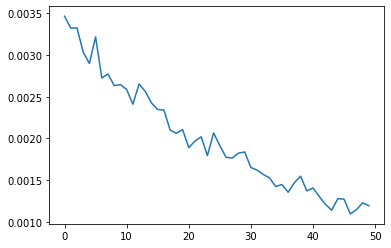

In [67]:
plt.plot(hist.history['loss'])
plt.show()

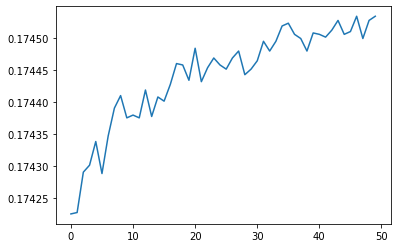

In [68]:
plt.plot(hist.history['accuracy'])
plt.show()

# Step 5. Î™®Îç∏ ÌèâÍ∞ÄÌïòÍ∏∞
Step 1ÏóêÏÑú ÏÑ†ÌÉùÌïú Ï†ÑÏ≤òÎ¶¨ Î∞©Î≤ïÏùÑ Í≥†Î†§ÌïòÏó¨ ÏûÖÎ†•Îêú Î¨∏Ïû•Ïóê ÎåÄÌï¥ÏÑú ÎåÄÎãµÏùÑ ÏñªÎäî ÏòàÏ∏° Ìï®ÏàòÎ•º ÎßåÎì≠ÎãàÎã§.

1. ÏÉàÎ°úÏö¥ ÏûÖÎ†• Î¨∏Ïû•Ïóê ÎåÄÌï¥ÏÑúÎäî ÌõàÎ†® ÎïåÏôÄ ÎèôÏùºÌïú Ï†ÑÏ≤òÎ¶¨Î•º Í±∞ÏπúÎã§.
2. ÏûÖÎ†• Î¨∏Ïû•ÏùÑ ÌÜ†ÌÅ¨ÎÇòÏù¥ÏßïÌïòÍ≥†, START_TOKENÍ≥º END_TOKENÏùÑ Ï∂îÍ∞ÄÌïúÎã§.
3. Ìå®Îî© ÎßàÏä§ÌÇπÍ≥º Î£© Ïñ¥Ìó§Îìú ÎßàÏä§ÌÇπÏùÑ Í≥ÑÏÇ∞ÌïúÎã§.
4. ÎîîÏΩîÎçîÎäî ÏûÖÎ†• ÏãúÌÄÄÏä§Î°úÎ∂ÄÌÑ∞ Îã§Ïùå Îã®Ïñ¥Î•º ÏòàÏ∏°ÌïúÎã§.
5. ÎîîÏΩîÎçîÎäî ÏòàÏ∏°Îêú Îã§Ïùå Îã®Ïñ¥Î•º Í∏∞Ï°¥Ïùò ÏûÖÎ†• ÏãúÌÄÄÏä§Ïóê Ï∂îÍ∞ÄÌïòÏó¨ ÏÉàÎ°úÏö¥ ÏûÖÎ†•ÏúºÎ°ú ÏÇ¨Ïö©ÌïúÎã§.
6. END_TOKENÏù¥ ÏòàÏ∏°ÎêòÍ±∞ÎÇò Î¨∏Ïû•Ïùò ÏµúÎåÄ Í∏∏Ïù¥Ïóê ÎèÑÎã¨ÌïòÎ©¥ ÎîîÏΩîÎçîÎäî ÎèôÏûëÏùÑ Î©àÏ∂òÎã§.

ÏúÑÏùò Í≥ºÏ†ïÏùÑ Î™®Îëê Îã¥ÏùÄ decoder_inference() Ìï®ÏàòÎ•º ÎßåÎì≠ÎãàÎã§.

In [45]:
def decoder_inference(sentence):
    sentence = preprocess_sentence(sentence)
    
    # ÏûÖÎ†•Îêú Î¨∏Ïû•ÏùÑ Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑ, ÏãúÏûë ÌÜ†ÌÅ∞Í≥º Ï¢ÖÎ£å ÌÜ†ÌÅ∞ÏùÑ ÏïûÎí§Î°ú Ï∂îÍ∞Ä.
    # ex) Where have you been? ‚Üí [[8331   86   30    5 1059    7 8332]]
    sentence = tf.expand_dims(START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)
    
    # ÎîîÏΩîÎçîÏùò ÌòÑÏû¨ÍπåÏßÄÏùò ÏòàÏ∏°Ìïú Ï∂úÎ†• ÏãúÌÄÄÏä§Í∞Ä ÏßÄÏÜçÏ†ÅÏúºÎ°ú Ï†ÄÏû•ÎêòÎäî Î≥ÄÏàò.
    # Ï≤òÏùåÏóêÎäî ÏòàÏ∏°Ìïú ÎÇ¥Ïö©Ïù¥ ÏóÜÏùåÏúºÎ°ú ÏãúÏûë ÌÜ†ÌÅ∞Îßå Î≥ÑÎèÑ Ï†ÄÏû•. ex) 8331
    output_sequence = tf.expand_dims(START_TOKEN, 0)
    
    # ÎîîÏΩîÎçîÏùò Ïù∏ÌçºÎü∞Ïä§ Îã®Í≥Ñ
    for i in range(MAX_LENGTH):
        # ÎîîÏΩîÎçîÎäî ÏµúÎåÄ MAX_LENGTHÏùò Í∏∏Ïù¥ÎßåÌÅº Îã§Ïùå Îã®Ïñ¥ ÏòàÏ∏°ÏùÑ Î∞òÎ≥µÌï©ÎãàÎã§.
        predictions = model(inputs=[sentence, output_sequence], training=False)
        predictions = predictions[:, -1:, :]
        
        # ÌòÑÏû¨ ÏòàÏ∏°Ìïú Îã®Ïñ¥Ïùò Ï†ïÏàò
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)
        
        # ÎßåÏïΩ ÌòÑÏû¨ ÏòàÏ∏°Ìïú Îã®Ïñ¥Í∞Ä Ï¢ÖÎ£å ÌÜ†ÌÅ∞Ïù¥ÎùºÎ©¥ forÎ¨∏ÏùÑ Ï¢ÖÎ£å
        if tf.equal(predicted_id, END_TOKEN[0]):
            break
            
        # ÏòàÏ∏°Ìïú Îã®Ïñ¥Îì§ÏùÄ ÏßÄÏÜçÏ†ÅÏúºÎ°ú output_sequenceÏóê Ï∂îÍ∞ÄÎê©ÎãàÎã§.
        # Ïù¥ output_sequenceÎäî Îã§Ïãú ÎîîÏΩîÎçîÏùò ÏûÖÎ†•Ïù¥ Îê©ÎãàÎã§.
        output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)
        
        
    return tf.squeeze(output_sequence, axis=0)
    
print("Ïäù=3")

Ïäù=3


ÏûÑÏùòÏùò ÏûÖÎ†• Î¨∏Ïû•Ïóê ÎåÄÌï¥ÏÑú decoder_inference() Ìï®ÏàòÎ•º Ìò∏Ï∂úÌïòÏó¨ Ï±óÎ¥áÏùò ÎåÄÎãµÏùÑ ÏñªÎäî sentence_generation() Ìï®ÏàòÎ•º ÎßåÎì≠ÎãàÎã§.

In [76]:
def sentence_generation(sentence):
    # ÏûÖÎ†• Î¨∏Ïû•Ïóê ÎåÄÌï¥ÏÑú ÎîîÏΩîÎçîÎ•º ÎèôÏûë ÏãúÏºú ÏòàÏ∏°Îêú Ï†ïÏàò ÏãúÌÄÄÏä§Î•º Î¶¨ÌÑ¥Î∞õÏäµÎãàÎã§.
    prediction = decoder_inference(sentence)
    
    # Ï†ïÏàò ÏãúÌÄÄÏä§Î•º Îã§Ïãú ÌÖçÏä§Ìä∏ ÏãúÌÄÄÏä§Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
    predicted_sentence = tokenizer.decode([i for i in prediction if i < tokenizer.vocab_size])
    
    print('ÏûÖÎ†• : {}'.format(sentence))
    print('Ï∂úÎ†• : {}'.format(predicted_sentence))
    
    return predicted_sentence
print("Ïäù=3")

Ïäù=3


In [47]:
sentence_generation('Ïû¨Î∞åÎã§')

ÏûÖÎ†• : Ïû¨Î∞åÎã§
Ï∂úÎ†• : Ï†ÄÎûë ÎÜÄÏïÑÏöî.


'Ï†ÄÎûë ÎÜÄÏïÑÏöî.'

In [48]:
sentence_generation('Î∞∞Í≥†ÌîÑÎã§.')

ÏûÖÎ†• : Î∞∞Í≥†ÌîÑÎã§.
Ï∂úÎ†• : ÌûòÎÇ¥ÏßÄ ÏïäÏïÑÎèÑ Í¥úÏ∞ÆÏïÑÏöî.


'ÌûòÎÇ¥ÏßÄ ÏïäÏïÑÎèÑ Í¥úÏ∞ÆÏïÑÏöî.'

In [50]:
sentence_generation('ÎÇòÎûë Î≥Ñ Î≥¥Îü¨ Í∞ÄÏßÄ ÏïäÏùÑÎûò?.')

ÏûÖÎ†• : ÎÇòÎûë Î≥Ñ Î≥¥Îü¨ Í∞ÄÏßÄ ÏïäÏùÑÎûò?.
Ï∂úÎ†• : Ï°∞Í∏àÎßå ÏïÑÌå†ÏúºÎ©¥ Ï¢ãÍ≤†Ïñ¥Ïöî.


'Ï°∞Í∏àÎßå ÏïÑÌå†ÏúºÎ©¥ Ï¢ãÍ≤†Ïñ¥Ïöî.'

In [51]:
sentence_generation('ÏöîÏ¶ò ÎÑàÎ¨¥ Ï∂îÏõå')

ÏûÖÎ†• : ÏöîÏ¶ò ÎÑàÎ¨¥ Ï∂îÏõå
Ï∂úÎ†• : Ï†ÄÎûë ÎÜÄÏïÑÏöî.


'Ï†ÄÎûë ÎÜÄÏïÑÏöî.'

In [52]:
sentence_generation('Ïù∏Í≥µÏßÄÎä•ÏùÄ Ïñ¥Î†§Ïõå')

ÏûÖÎ†• : Ïù∏Í≥µÏßÄÎä•ÏùÄ Ïñ¥Î†§Ïõå
Ï∂úÎ†• : Ï†ÄÎûë ÎÜÄÏïÑÏöî.


'Ï†ÄÎûë ÎÜÄÏïÑÏöî.'

In [70]:
EPOCHS = 100
hist = model.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/100
185/185 [==============================] - 9s 51ms/step - loss: 0.0012 - accuracy: 0.1745
Epoch 2/100
185/185 [==============================] - 9s 50ms/step - loss: 0.0012 - accuracy: 0.1745
Epoch 3/100
185/185 [==============================] - 9s 51ms/step - loss: 0.0011 - accuracy: 0.1745
Epoch 4/100
185/185 [==============================] - 9s 50ms/step - loss: 0.0012 - accuracy: 0.1745
Epoch 5/100
185/185 [==============================] - 9s 51ms/step - loss: 0.0012 - accuracy: 0.1745
Epoch 6/100
185/185 [==============================] - 9s 51ms/step - loss: 0.0011 - accuracy: 0.1745
Epoch 7/100
185/185 [==============================] - 9s 50ms/step - loss: 0.0011 - accuracy: 0.1745
Epoch 8/100
185/185 [==============================] - 9s 51ms/step - loss: 0.0010 - accuracy: 0.1745
Epoch 9/100
185/185 [==============================] - 10s 51ms/step - loss: 9.5133e-04 - accuracy: 0.1745
Epoch 10/100
185/185 [==============================] - 10s 53ms/step - loss:

In [71]:
sentence_generation('Ïû¨Î∞åÎã§')

ÏûÖÎ†• : Ïû¨Î∞åÎã§
Ï∂úÎ†• : ÏßÄÍ∏à Î¨¥Ïä® ÎßêÏùÑ Ìï¥ÎèÑ ÏôÄÎãøÏßÄ ÏïäÍ≤†ÏßÄÎßå Ïûò Ïù¥Í≤®ÎÇº Í±∞Îùº ÎØøÏñ¥Ïöî.


'ÏßÄÍ∏à Î¨¥Ïä® ÎßêÏùÑ Ìï¥ÎèÑ ÏôÄÎãøÏßÄ ÏïäÍ≤†ÏßÄÎßå Ïûò Ïù¥Í≤®ÎÇº Í±∞Îùº ÎØøÏñ¥Ïöî.'

In [72]:
sentence_generation('ÌûòÎì§Îã§')

ÏûÖÎ†• : ÌûòÎì§Îã§
Ï∂úÎ†• : ÏßÄÍ∏à Î¨¥Ïä® ÎßêÏùÑ Ìï¥ÎèÑ ÏôÄÎãøÏßÄ ÏïäÍ≤†ÏßÄÎßå Ïûò Ïù¥Í≤®ÎÇº Í±∞Îùº ÎØøÏñ¥Ïöî.


'ÏßÄÍ∏à Î¨¥Ïä® ÎßêÏùÑ Ìï¥ÎèÑ ÏôÄÎãøÏßÄ ÏïäÍ≤†ÏßÄÎßå Ïûò Ïù¥Í≤®ÎÇº Í±∞Îùº ÎØøÏñ¥Ïöî.'

In [73]:
sentence_generation('Î∞∞Í≥†ÌîÑÎã§')

ÏûÖÎ†• : Î∞∞Í≥†ÌîÑÎã§
Ï∂úÎ†• : ÏßÄÍ∏à Î¨¥Ïä® ÎßêÏùÑ Ìï¥ÎèÑ ÏôÄÎãøÏßÄ ÏïäÍ≤†ÏßÄÎßå Ïûò Ïù¥Í≤®ÎÇº Í±∞Îùº ÎØøÏñ¥Ïöî.


'ÏßÄÍ∏à Î¨¥Ïä® ÎßêÏùÑ Ìï¥ÎèÑ ÏôÄÎãøÏßÄ ÏïäÍ≤†ÏßÄÎßå Ïûò Ïù¥Í≤®ÎÇº Í±∞Îùº ÎØøÏñ¥Ïöî.'

In [77]:
sentence_generation('ÌïòÎäòÏù¥ ÏòàÏÅòÎã§')

ÏûÖÎ†• : ÌïòÎäòÏù¥ ÏòàÏÅòÎã§
Ï∂úÎ†• : ÏßÄÍ∏à Î¨¥Ïä® ÎßêÏùÑ Ìï¥ÎèÑ ÏôÄÎãøÏßÄ ÏïäÍ≤†ÏßÄÎßå Ïûò Ïù¥Í≤®ÎÇº Í±∞Îùº ÎØøÏñ¥Ïöî.


'ÏßÄÍ∏à Î¨¥Ïä® ÎßêÏùÑ Ìï¥ÎèÑ ÏôÄÎãøÏßÄ ÏïäÍ≤†ÏßÄÎßå Ïûò Ïù¥Í≤®ÎÇº Í±∞Îùº ÎØøÏñ¥Ïöî.'

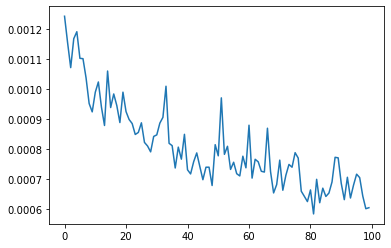

In [75]:
plt.plot(hist.history['loss'])
plt.show()

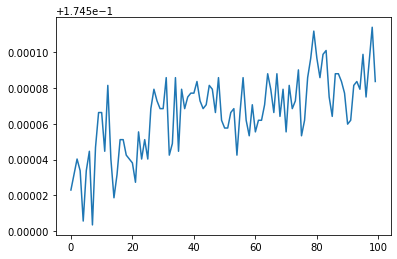

In [74]:
plt.plot(hist.history['accuracy'])
plt.show()

# Ï¥ùÌèâ

1. ÌïúÍµ≠Ïñ¥ Ï†ÑÏ≤òÎ¶¨Î•º ÌÜµÌï¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Íµ¨Ï∂ïÌïòÏòÄÎã§.
Í≥µÎ∞±Í≥º ÌäπÏàòÎ¨∏Ïûê Ï≤òÎ¶¨, ÌÜ†ÌÅ¨ÎÇòÏù¥Ïßï, Î≥ëÎ†¨Îç∞Ïù¥ÌÑ∞ Íµ¨Ï∂ïÏùò Í≥ºÏ†ïÏù¥ Ï†ÅÏ†àÌûà ÏßÑÌñâÎêòÏóàÎã§.

2. Ìä∏ÎûúÏä§Ìè¨Î®∏ Î™®Îç∏ÏùÑ Íµ¨ÌòÑÌïòÏó¨ ÌïúÍµ≠Ïñ¥ Ï±óÎ¥á Î™®Îç∏ ÌïôÏäµÏùÑ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú ÏßÑÌñâÌïòÏòÄÎã§.
Íµ¨ÌòÑÌïú Ìä∏ÎûúÏä§Ìè¨Î®∏ Î™®Îç∏Ïù¥ ÌïúÍµ≠Ïñ¥ Î≥ëÎ†¨ Îç∞Ïù¥ÌÑ∞ ÌïôÏäµ Ïãú ÏïàÏ†ïÏ†ÅÏúºÎ°ú ÏàòÎ†¥ÌïòÏòÄÎã§.

3. ÌïúÍµ≠Ïñ¥ ÏûÖÎ†•Î¨∏Ïû•Ïóê ÎåÄÌï¥ ÌïúÍµ≠Ïñ¥Î°ú ÎãµÎ≥ÄÌïòÎäî Ìï®ÏàòÎ•º Íµ¨ÌòÑÌïòÏòÄÎã§.
ÌïúÍµ≠Ïñ¥ ÏûÖÎ†•Î¨∏Ïû•Ïóê Í∑∏Îü¥ÎìØÌïú ÌïúÍµ≠Ïñ¥Î°ú ÎãµÎ≥ÄÏùÑ Î¶¨ÌÑ¥ÌïòÏòÄÎã§.


Ï≤òÏùåÏúºÎ°ú ÌååÏù¥Ïç¨ÏóêÏÑú Í∑∏ÎûòÌîÑ Î∞∞Ïö¥ Í≤ÉÏùÑ Ï∞æÏïÑÏÑú ÌôúÏö©Ìï¥Î¥§ÎäîÎç∞ Ï†ÄÍ≤å ÎßûÎäîÏßÄÎäî Î™®Î•¥Í≤†Îã§. Î™®Îç∏ ÌõàÎ†® Í≥ºÏ†ïÏùÑ Í∑∏ÎûòÌîÑÎ°ú Î≥¥Îãà epochÍ∞Ä Ïò¨ÎùºÍ∞àÏàòÎ°ù Ï†êÏ†ê lossÎäî ÎÇÆÏïÑÏßÄÎäî Í≤ÉÏù¥ Î≥¥ÏòÄÎã§. Í∑∏ÎûòÏÑú epochÎ•º 100ÍπåÏßÄ Ìï¥Î≥¥Îãà accÎäî Ï¶ùÍ∞ÄÌïòÏßÄ ÏïäÏïòÎã§.   
ÌïúÍµ≠Ïñ¥Î°ú ÏûÖÎ†•Î¨∏Ïû•Ïóê ÎåÄÌï¥ÏÑ† Ï†úÎåÄÎ°ú Îêú ÎãµÎ≥ÄÏùÑ Î≥¥Ïù¥ÏßÄ ÏïäÏïòÍ≥† ÏßàÎ¨∏Ïóê Í∞ôÏùÄ ÎåÄÎãµÏùÑ ÌïòÎäî Í≤ΩÏö∞Í∞Ä ÎßéÏïòÎã§. 100Î≤àÏùÑ ÎèåÎ¶¨Îãà Í≥ÑÏÜç Í∞ôÏùÄ ÎåÄÎãµÎßå ÎÇòÏò®Îã§. Î≠êÍ∞Ä ÏûòÎ™ªÎêú Í≤É Í∞ôÏùÄÎç∞.. Î≠êÍ∞Ä ÏûòÎ™ªÎêú Í≤ÉÏù∏ÏßÄÎäî Ïûò Î™®Î•¥Í≤†Îã§. 